In [326]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [327]:
train_data= pd.read_csv("/content/drive/My Drive/Pet_Adoption_Dataset/train.csv")

In [328]:
test_data= pd.read_csv("/content/drive/My Drive/Pet_Adoption_Dataset/test.csv")

In [329]:
train_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [330]:
test_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


In [331]:
train_data = train_data.drop(["pet_id", "issue_date", "listing_date"], axis=1)

In [332]:
train_data.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,1.0,White,0.72,14.19,13,9,0.0,2
2,NaN,Brown,0.15,40.90,15,4,2.0,4
3,1.0,White,0.62,17.82,0,1,0.0,2
4,2.0,Black,0.50,11.06,18,4,0.0,1


In [333]:
train_data["train"]=0

In [334]:
test_data_copy = test_data.drop(["pet_id", "issue_date", "listing_date"], axis=1)

In [335]:
test_data_copy.head()

,condition,color_type,length(m),height(cm),X1,X2
0,0.0,Black,0.87,42.73,0,7
1,1.0,Orange Tabby,0.06,6.71,0,1
2,1.0,Black,0.24,41.21,0,7
3,1.0,Black,0.29,8.46,7,1
4,1.0,Brown,0.71,30.92,0,7


In [336]:
test_data_copy["train"]=1

In [337]:
test_data_copy.isnull().sum()

condition     619
color_type      0
length(m)       0
height(cm)      0
X1              0
X2              0
train           0
dtype: int64

In [338]:
merged_data = pd.concat([test_data_copy, train_data])

In [339]:
merged_data

,condition,color_type,length(m),height(cm),X1,X2,train,breed_category,pet_category
0,0.0,Black,0.87,42.73,0,7,1,NaN,NaN
1,1.0,Orange Tabby,0.06,6.71,0,1,1,NaN,NaN
2,1.0,Black,0.24,41.21,0,7,1,NaN,NaN
3,1.0,Black,0.29,8.46,7,1,1,NaN,NaN
4,1.0,Brown,0.71,30.92,0,7,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
18829,2.0,Tricolor,0.44,27.36,0,1,0,0.0,2.0
18830,NaN,Brown,0.73,14.25,15,4,0,2.0,4.0
18831,0.0,Calico Point,0.99,28.13,13,9,0,1.0,1.0
18832,0.0,Tan,0.55,44.82,13,9,0,1.0,2.0


In [340]:
merged_data.isnull().sum()

condition         2096
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
train                0
breed_category    8072
pet_category      8072
dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8966.,    0.,    0.,    0.,    0., 9747.,    0.,    0.,    0.,
        6097.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

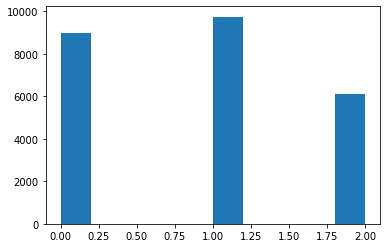

In [341]:
plt.hist(merged_data["condition"])

In [342]:
merged_data["condition"].value_counts()

1.0    9747
0.0    8966
2.0    6097
Name: condition, dtype: int64

In [343]:
print("The mean {}, median {}".format(merged_data["condition"].mean(), merged_data["condition"].median()))

The mean 0.8843611446997178, median 1.0


In [344]:
merged_data["condition"] = merged_data["condition"].fillna(merged_data["condition"].median())

In [345]:
merged_data.isnull().sum()

condition            0
color_type           0
length(m)            0
height(cm)           0
X1                   0
X2                   0
train                0
breed_category    8072
pet_category      8072
dtype: int64

In [346]:
merged_data["condition"].value_counts()

1.0    11843
0.0     8966
2.0     6097
Name: condition, dtype: int64

In [347]:
merged_data["color_type"].value_counts()

Black                6575
White                3486
Brown                2592
Brown Tabby          2399
Tan                  1934
Blue                 1235
Orange Tabby         1123
Red                   742
Brown Brindle         718
Tricolor              664
Blue Tabby            557
Tortie                512
Calico                495
Gray                  436
Chocolate             392
Torbie                341
Cream Tabby           260
Cream                 240
Sable                 232
Fawn                  215
Yellow                208
Buff                  183
Lynx Point            173
Blue Merle            134
Seal Point            115
Gray Tabby             96
Black Brindle          92
Black Tabby            86
Flame Point            74
Brown Merle            61
Orange                 56
Black Smoke            42
Blue Tick              41
Gold                   40
Silver                 34
Tortie Point           34
Red Tick               34
Silver Tabby           26
Red Merle   

In [348]:
merged_data["breed_category"].value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [349]:
merged_data["pet_category"].value_counts()

2.0    10621
1.0     7184
4.0      941
0.0       88
Name: pet_category, dtype: int64

In [350]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
merged_data["color_type"] = le.fit_transform(merged_data["color_type"])

In [351]:
merged_data.head()

,condition,color_type,length(m),height(cm),X1,X2,train,breed_category,pet_category
0,0.0,2,0.87,42.73,0,7,1,NaN,NaN
1,1.0,38,0.06,6.71,0,1,1,NaN,NaN
2,1.0,2,0.24,41.21,0,7,1,NaN,NaN
3,1.0,2,0.29,8.46,7,1,1,NaN,NaN
4,1.0,15,0.71,30.92,0,7,1,NaN,NaN


(array([2478., 2652., 2955., 2426., 2718., 2927., 2628., 2476., 2737.,
        2909.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

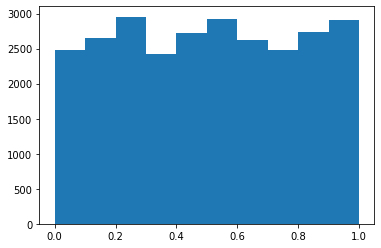

In [352]:
plt.hist(merged_data["length(m)"])

(array([2657., 2733., 2713., 2742., 2688., 2724., 2602., 2641., 2702.,
        2704.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

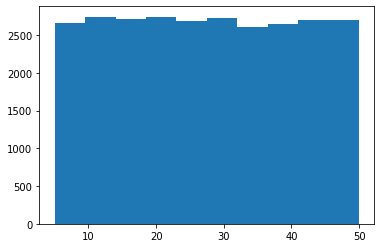

In [353]:
plt.hist(merged_data["height(cm)"])

In [354]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
merged_data[["condition", "color_type", "length(m)","height(cm)", "X1",	"X2", "breed_category",	"pet_category"]] = scaler.fit_transform(merged_data[["condition", "color_type", 	"length(m)","height(cm)", "X1",	"X2", "breed_category",	"pet_category"]])

# plt.hist(merged_data["X1"])

In [355]:
# merged_data = np.log(merged_data)

In [356]:
merged_data = pd.DataFrame(merged_data)

In [357]:
merged_data.head()

,condition,color_type,length(m),height(cm),X1,X2,train,breed_category,pet_category
0,-1.206301,-1.160783,1.266460,1.176432,-0.814202,0.694493,1,NaN,NaN
1,0.143981,0.694711,-1.536548,-1.596722,-0.814202,-1.010281,1,NaN,NaN
2,0.143981,-1.160783,-0.913657,1.059409,-0.814202,0.694493,1,NaN,NaN
3,0.143981,-1.160783,-0.740632,-1.461991,0.254101,-1.010281,1,NaN,NaN
4,0.143981,-0.490744,0.712779,0.267189,-0.814202,0.694493,1,NaN,NaN


In [358]:
train_data_scaled = merged_data[merged_data["train"]==0]

In [359]:
test_data_scaled = merged_data[merged_data["train"]== 1 ]

In [360]:
train_data_scaled = train_data_scaled.drop(["train"], axis=1)

In [361]:
train_data_scaled.head()

,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,1.494263,-0.336119,1.024225,-1.514343,1.169789,1.262750,-0.953477,-0.987801
1,0.143981,1.467833,0.747384,-1.020842,1.169789,1.262750,-0.953477,0.405149
2,0.143981,-0.490744,-1.225103,1.035542,1.475018,-0.157894,2.221802,3.191051
3,0.143981,1.467833,0.401334,-0.741371,-0.814202,-1.010281,-0.953477,0.405149
4,1.494263,-1.160783,-0.013926,-1.261818,1.932862,-0.157894,-0.953477,-0.987801


In [362]:
train_data_scaled.shape

(18834, 8)

In [363]:
test_data_scaled = test_data_scaled.drop(["train", "breed_category", "pet_category"], axis=1)

In [364]:
test_data_scaled.head()

,condition,color_type,length(m),height(cm),X1,X2
0,-1.206301,-1.160783,1.266460,1.176432,-0.814202,0.694493
1,0.143981,0.694711,-1.536548,-1.596722,-0.814202,-1.010281
2,0.143981,-1.160783,-0.913657,1.059409,-0.814202,0.694493
3,0.143981,-1.160783,-0.740632,-1.461991,0.254101,-1.010281
4,0.143981,-0.490744,0.712779,0.267189,-0.814202,0.694493


In [365]:
test_data_scaled.shape

(8072, 6)

In [366]:
train_data_breed = train_data_scaled.drop(["pet_category"], axis = 1)
train_data_pet = train_data_scaled.drop(["breed_category"], axis = 1) 

In [370]:
train_data_breed.to_csv("Breed Category Data", index = False)
train_data_pet.to_csv("Pet Category Data", index = False)

In [369]:
submission_data = test_data["pet_id"]
submission_data.to_csv("Submission Data", index= False)